In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("housing.csv")

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [57]:
df_small = df[(df.ocean_proximity == "<1H OCEAN") | (df.ocean_proximity == "INLAND")].copy()

In [59]:
df_small.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


### Preperation

In [62]:
df_small.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [64]:
df_small['total_bedrooms'] = df_small['total_bedrooms'].fillna(0)

In [66]:
df_small.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

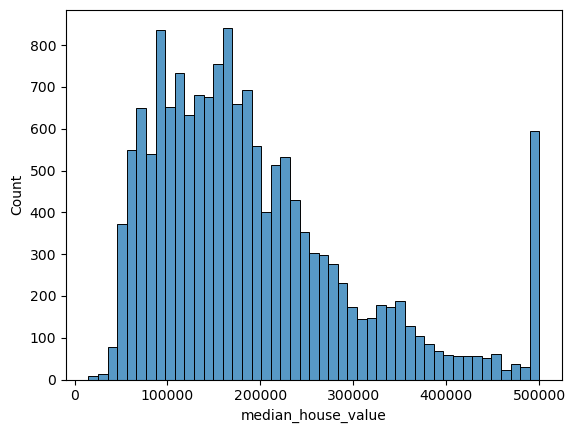

In [68]:
sns.histplot(df_small, x="median_house_value")

In [70]:
df_small['median_house_value'] = np.log1p(df_small['median_house_value'])

D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

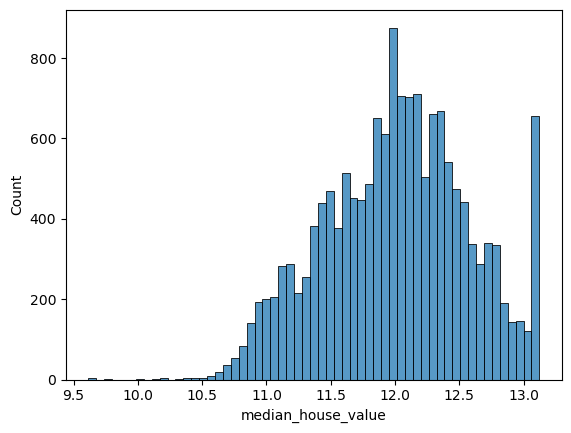

In [72]:
sns.histplot(df_small, x="median_house_value")

In [74]:
from sklearn.model_selection import train_test_split

In [80]:
df_full_train, df_test = train_test_split(df_small, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [86]:
all_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']

In [88]:
from sklearn.feature_extraction import DictVectorizer

In [96]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(df_train[all_cols].to_dict(orient='records'))
y_train = df_train.median_house_value

In [98]:
X_val = dv.transform(df_val[all_cols].to_dict(orient='records'))
y_val = df_val.median_house_value
X_test = dv.transform(df_test[all_cols].to_dict(orient='records'))
y_test = df_test.median_house_value

## Question 1
### Let's train a decision tree regressor to predict the median_house_value variable.

* Train a model with max_depth=1.

In [103]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [105]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

[Text(0.5, 0.75, 'ocean_proximity=<1H OCEAN <= 0.5\nsquared_error = 0.322\nsamples = 9411\nvalue = 12.011'),
 Text(0.25, 0.25, 'squared_error = 0.23\nsamples = 3924\nvalue = 11.607'),
 Text(0.75, 0.25, 'squared_error = 0.186\nsamples = 5487\nvalue = 12.301')]

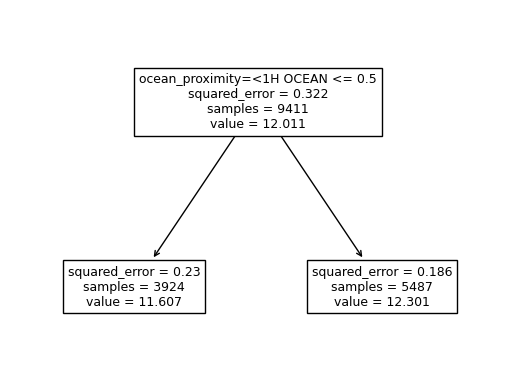

In [111]:
plot_tree(dt, feature_names=dv.get_feature_names_out().tolist())

#### Which feature is used for splitting the data?

* `ocean_proximity`
* total_rooms
* latitude
* population

## Question 2
### Train a random forest model with these parameters:

* n_estimators=10
* random_state=1
* n_jobs=-1 (optional - to make training faster)

In [116]:
from sklearn.ensemble import RandomForestRegressor

In [132]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [133]:
from sklearn.metrics import mean_squared_error

In [155]:
round(mean_squared_error(y_val, rf.predict(X_val), squared=False), 3)

0.245

In [148]:
def rmse(y_true, y_pred):
    sqsum = 0
    for yt,yp in zip(y_true, y_pred):
        sqsum += np.square(yt-yp)
    return np.sqrt(sqsum/len(y_true))

In [157]:
round(rmse(y_val, rf.predict(X_val)), 3)

0.245

#### What's the RMSE of this model on validation?

* 0.045
* `0.245`
* 0.545
* 0.845

## Question 3
### Now let's experiment with the n_estimators parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set random_state to 1.
* Evaluate the model on the validation dataset.

In [161]:
from tqdm.auto import tqdm

In [167]:
rmse_losses = []
ns = [i for i in range(10, 201, 10)]
for n in tqdm(ns, total=len(ns)):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    rmse_losses.append(mean_squared_error(y_val, rf.predict(X_val), squared=False))

rmse_df = pd.DataFrame()
rmse_df["n_estimators"] = ns
rmse_df["rmse"] = rmse_losses
rmse_df

  0%|          | 0/20 [00:00<?, ?it/s]

,n_estimators,rmse
0,10,0.244600
1,20,0.237804
2,30,0.236207
3,40,0.234715
4,50,0.234576
5,60,0.234197
6,70,0.234187
7,80,0.234388
8,90,0.234304
9,100,0.234130


In [173]:
rmse_df.sort_values("rmse")

,n_estimators,rmse
15,160,0.233315
16,170,0.233326
14,150,0.233528
17,180,0.233564
13,140,0.233637
19,200,0.233766
12,130,0.233799
18,190,0.233840
11,120,0.233895
9,100,0.234130


D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='n_estimators', ylabel='rmse'>

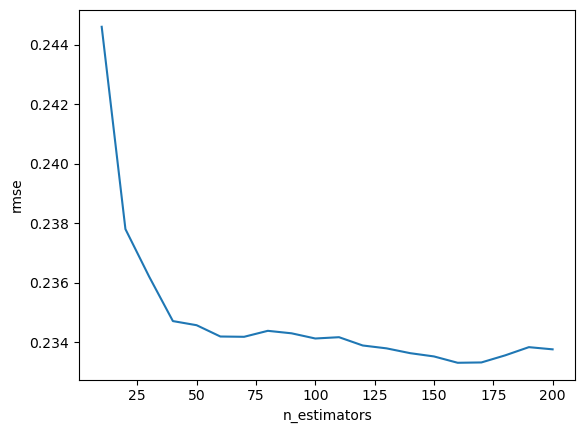

In [169]:
sns.lineplot(rmse_df, x="n_estimators", y="rmse")

#### After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

* 10
* 25
* 50
* `160`

## Question 4
### Let's select the best max_depth:

* Try different values of max_depth: [10, 15, 20, 25]
* For each of these values,
    * try different values of n_estimators from 10 till 200 (with step 10)
    * calculate the mean RMSE
* Fix the random seed: random_state=1

In [177]:
ns = [i for i in range(10, 201, 10)]
rmse_df = pd.DataFrame()
rmse_df["n_estimators"] = ns
for max_depth in tqdm([10, 15, 20, 25], total=4):
    rmse_losses = []
    for n in tqdm(ns, total=len(ns)):
        rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1, max_depth=max_depth)
        rf.fit(X_train, y_train)
        rmse_losses.append(mean_squared_error(y_val, rf.predict(X_val), squared=False))

    rmse_df[max_depth] = rmse_losses

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

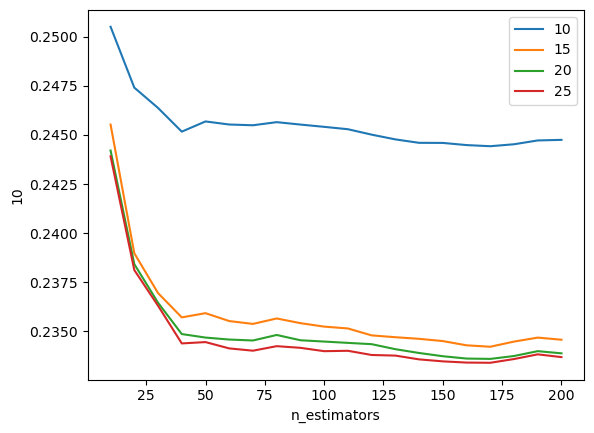

In [181]:
for max_depth in [10, 15, 20, 25]:
    sns.lineplot(rmse_df, x="n_estimators", y=max_depth, label=max_depth)
plt.show()

#### What's the best max_depth, using the mean RMSE?

* 10
* 15
* 20
* `25`

## Question 5
### We can extract feature importance information from tree-based models.

<p>At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.</p>

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
    * n_estimators=10,
    * max_depth=20,
    * random_state=1,
    * n_jobs=-1 (optional)
* Get the feature importance information from this model

In [191]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1, max_depth=20)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [211]:
df_fi = pd.DataFrame()
df_fi["feature_name"] = dv.get_feature_names_out()
df_fi["feature_importance"] = rf.feature_importances_
df_fi.sort_values("feature_importance", ascending=False)

,feature_name,feature_importance
4,median_income,0.335486
5,ocean_proximity=<1H OCEAN,0.218820
6,ocean_proximity=INLAND,0.147460
2,latitude,0.102665
3,longitude,0.085853
1,housing_median_age,0.030063
7,population,0.028115
9,total_rooms,0.021062
8,total_bedrooms,0.015434
0,households,0.015043


#### What's the most important feature (among these 4)?

* total_rooms
* `median_income`
* total_bedrooms
* longitude

## Question 6
### Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:
``` python
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change eta from 0.3 to 0.1.

In [236]:
import xgboost as xgb

In [265]:
features = dv.get_feature_names_out()
features[features == "ocean_proximity=<1H OCEAN"] = "ocean_proximity=lt 1H OCEAN"
features = features.tolist()

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, feature_names=features)

In [283]:
watchlist = [(dval, 'val')]

In [290]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model3 = xgb.train(params=xgb_params, dtrain=dtrain, num_boost_round=100)

print("rsme for 0.3 -> %f" % (mean_squared_error(y_val, model3.predict(dval), squared=False)))

rsme for 0.3 -> 0.228623


In [292]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model1 = xgb.train(params=xgb_params, dtrain=dtrain, num_boost_round=100)

print("rsme for 0.1 -> %f" % (mean_squared_error(y_val, model3.predict(dval), squared=False)))

rsme for 0.1 -> 0.228623


#### Which eta leads to the best RMSE score on the validation dataset?

* `0.3`
* 0.1
* Both give equal value